In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/pitcher.csv',index_col=0)

In [47]:
df['pitch_p_out'] = df['投球数'] / df['get_out']
df['Kp'] = df['奪三振'] / df['打者数']
df['BBp'] = (df['与四球'] + df['与死球']) / df['打者数']

In [48]:
df.columns

Index(['選手名', '球団', '一軍', '防御率', '勝', '負', 'S', '奪三振', '試合数', '投球回', '奪三振率',
       '投球数', '打者数', '被安打', '被本塁打', '与四球', '与死球', '敬遠', '失点', '自責点', '完投',
       '完封', '無四球', '被打率', 'QS率', '援護点', '援護率', 'WHIP', 'UP打数', 'UP被安打',
       'UP被打率', 'UP被本塁打', '最高球速', '最低球速', '球速差', 'yaer', 'get_out',
       'pitch_per_ab', 'pitch_p_out', 'Kp', 'BBp'],
      dtype='object')

In [49]:
df.sort_values('最高球速').tail(5)

,選手名,球団,一軍,防御率,勝,負,S,奪三振,試合数,投球回,...,UP被本塁打,最高球速,最低球速,球速差,yaer,get_out,pitch_per_ab,pitch_p_out,Kp,BBp
27,マシソン,巨,○,1.03,2,2,0,77,63,61,...,1,160,118,42,2013,183.0,4.293617,5.513661,0.327660,0.085106
1025,大谷翔平,日,○,2.24,15,5,0,196,22,1602/3,...,4,161,105,56,2015,482.0,3.964573,5.107884,0.315620,0.078905
95,マシソン,巨,○,2.36,8,4,1,98,70,80,...,2,162,122,40,2016,240.0,4.055385,5.491667,0.301538,0.070769
994,大谷翔平,日,○,2.61,11,4,0,179,24,1551/3,...,4,162,103,59,2014,466.0,3.971831,5.446352,0.280125,0.095462
1057,大谷翔平,日,NaN,1.86,10,4,0,174,21,140,...,2,164,104,60,2016,420.0,4.067518,5.307143,0.317518,0.096715


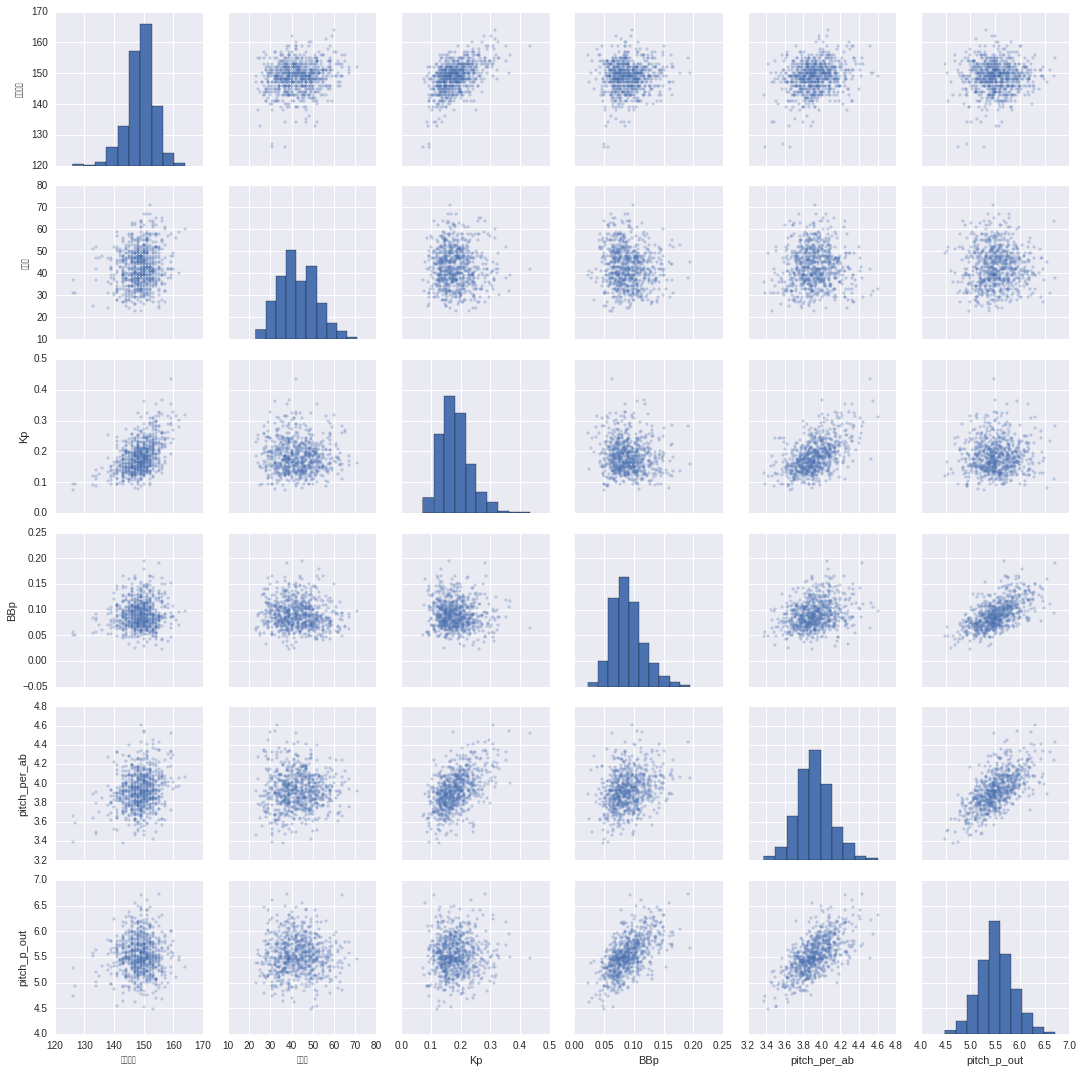

In [50]:
sns.pairplot(df[['最高球速','球速差','Kp','BBp','pitch_per_ab', 'pitch_p_out']][df['get_out'] > 100],
            markers="+")

(array([  11.,    6.,   27.,   76.,  257.,  511.,  474.,  209.,   44.,    7.]),
 array([ 123. ,  127.1,  131.2,  135.3,  139.4,  143.5,  147.6,  151.7,
         155.8,  159.9,  164. ]),
 <a list of 10 Patch objects>)

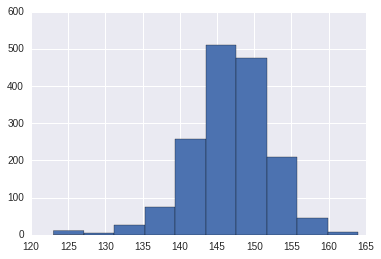

In [32]:
plt.hist(df['最高球速'])

# 純粋にめっちゃ投げる人たち

In [27]:
df.sort_values('投球数',ascending=False).head(10)[['選手名', '投球数']]

,選手名,投球数
601,メッセンジャー,3544
1235,金子千尋,3455
1595,則本昂大,3384
625,藤浪晋太郎,3374
580,メッセンジャー,3265
629,メッセンジャー,3255
493,大野雄大,3250
1531,則本昂大,3221
663,メッセンジャー,3218
1564,則本昂大,3196


# 一定打者数を相手にした中で

In [51]:
df[df['打者数'] > 27].sort_values('pitch_per_ab', ascending=False).head(20)[['選手名', '投球数', 'pitch_per_ab', 'yaer']]

,選手名,投球数,pitch_per_ab,yaer
147,大場達也,157,4.757576,2013
1004,石井裕也,233,4.755102,2014
858,髙橋朋己,1187,4.600775,2014
838,髙橋朋己,354,4.597403,2013
1249,桑原謙太朗,193,4.595238,2013
648,桑原謙太朗,156,4.588235,2015
1364,千賀滉大,133,4.586207,2012
1030,瀬川隼郎,214,4.553191,2015
1561,松井裕樹,1291,4.545775,2015
657,伊藤和雄,150,4.545455,2016


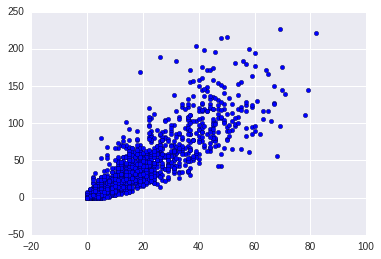

In [14]:
plt.scatter(df['与四球'], df['奪三振'])

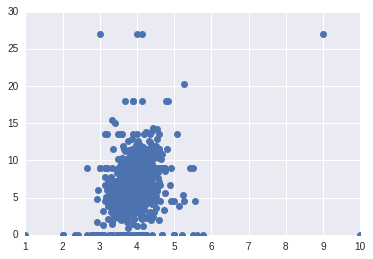

In [7]:
plt.plot(df['pitch_per_ab'], df['奪三振率'], 'o')